#  Dataset Information
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv(r"C:\Users\Nomitech\Desktop\Machine learning\Loan Prediction Dataset.csv")

In [108]:
#Get Stats 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [109]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
##Check for null valiues
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
# Fill the missing values in numerical columns with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [113]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [114]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [115]:
# Fill the missing values in categorical columns with mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [116]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


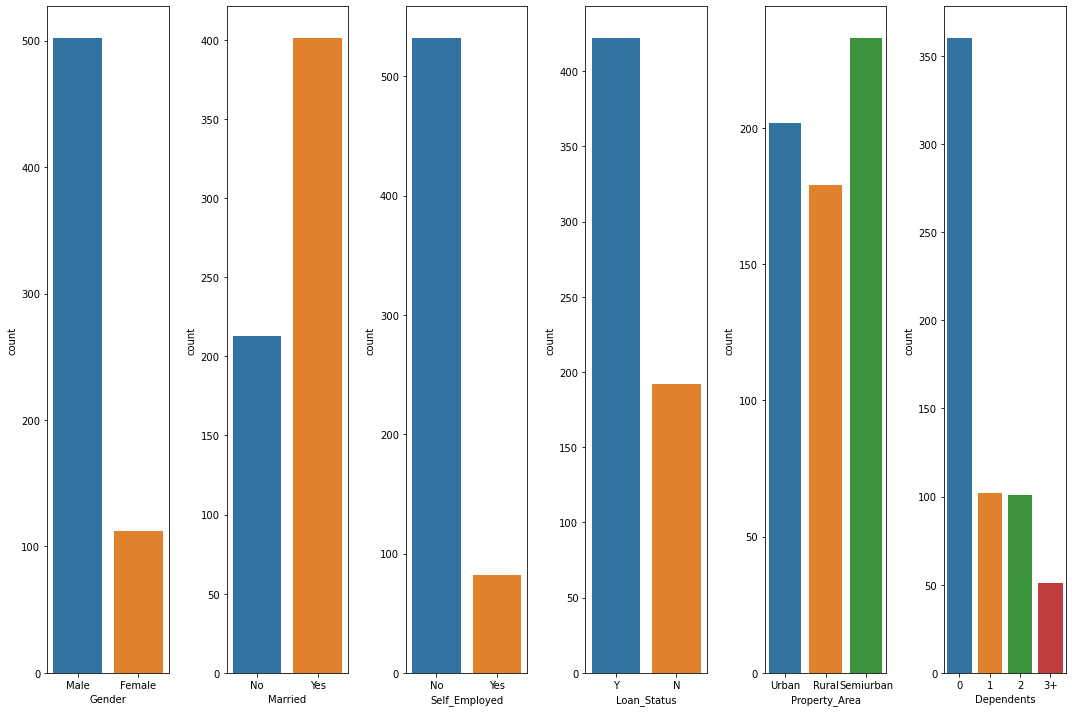

In [118]:
cols = ["Gender", "Married",'Self_Employed','Loan_Status','Property_Area',"Dependents"]
f, axs = plt.subplots(1, len(cols), figsize=(15, 10))
for ax, col in zip(axs, cols):
    sns.countplot(data=df, x=col, ax=ax)
f.tight_layout()
       

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

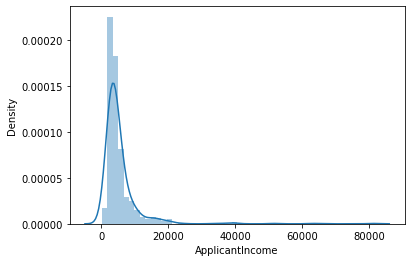

In [119]:
## Numerical attributes visualization
sns.distplot(df['ApplicantIncome'])


In [120]:
##New Atribute 
#We add the 'ApplicantIncome with CoApplicantIncome beacuse probably they are from the same family so we will create a new column with total income
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [121]:
##Apply log transformation to the attribute
df['ApplicantIncome']=np.log(df['ApplicantIncome']+1)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

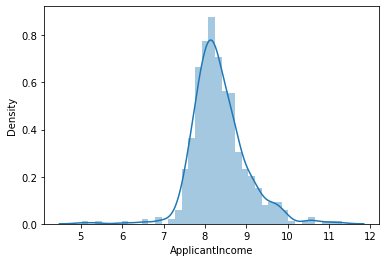

In [122]:
sns.distplot(df['ApplicantIncome'])
##This is better shape for our machine learning model
##We also can perform standardization or normalization in order to train our model better

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

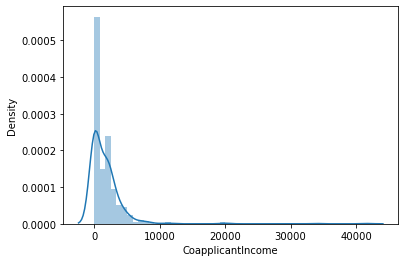

In [123]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

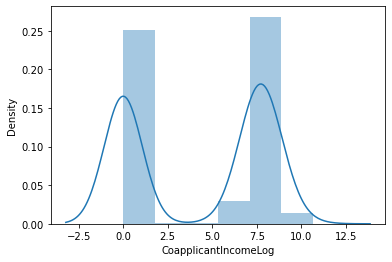

In [124]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

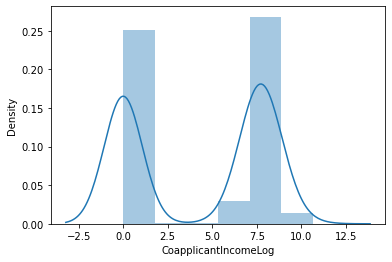

In [125]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

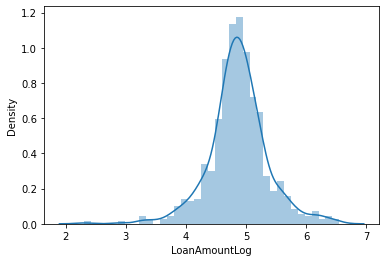

In [126]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

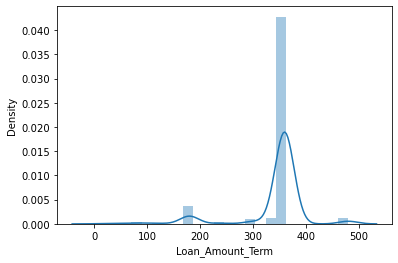

In [127]:
sns.distplot(df['Loan_Amount_Term'])

In [128]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])

In [129]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,CoapplicantIncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,8.674197,0.0,146.412162,5.886104,1.0,Urban,Y,5849.0,0.000000,4.993232
1,LP001003,Male,Yes,1,Graduate,No,8.430327,1508.0,128.000000,5.886104,1.0,Rural,N,6091.0,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.0,66.000000,5.886104,1.0,Urban,Y,3000.0,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,2358.0,120.000000,5.886104,1.0,Urban,Y,4941.0,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,8.699681,0.0,141.000000,5.886104,1.0,Urban,Y,6000.0,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972811,0.0,71.000000,5.886104,1.0,Rural,Y,2900.0,0.000000,4.276666
610,LP002979,Male,Yes,3+,Graduate,No,8.320448,0.0,40.000000,5.192957,1.0,Rural,Y,4106.0,0.000000,3.713572
611,LP002983,Male,Yes,1,Graduate,No,8.996280,240.0,253.000000,5.886104,1.0,Urban,Y,8312.0,5.484797,5.537334
612,LP002984,Male,Yes,2,Graduate,No,8.933796,0.0,187.000000,5.886104,1.0,Urban,Y,7583.0,0.000000,5.236442


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

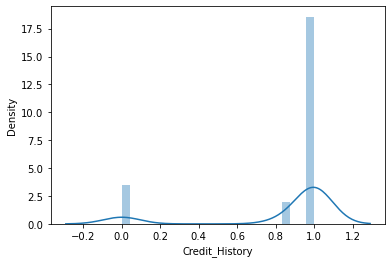

In [130]:
sns.distplot(df['Credit_History'])

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

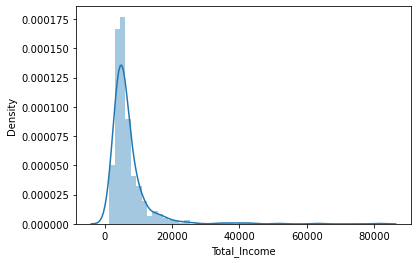

In [131]:
sns.distplot(df['Total_Income'])

In [132]:
df['Total_Income']=np.log(df['Total_Income'])


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

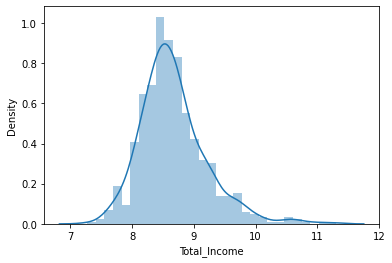

In [133]:
sns.distplot(df['Total_Income'])

#  Coorelation Matrix
corr=df.corr(
sns.heatmap(corr,annot=True)

<AxesSubplot:>

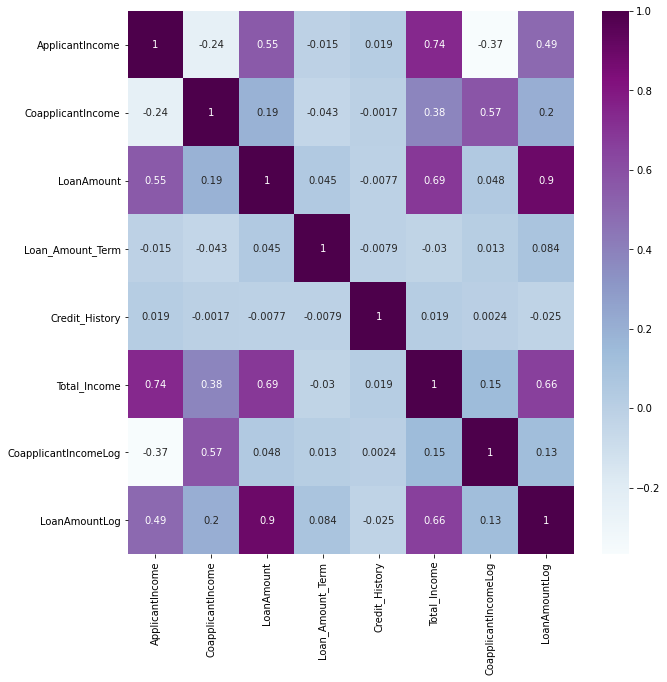

In [134]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [135]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'CoapplicantIncomeLog', 'LoanAmountLog'],
      dtype='object')

In [136]:
df.drop(columns=['CoapplicantIncome','LoanAmount','Loan_ID'],axis=1,inplace=True)

In [137]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,CoapplicantIncomeLog,LoanAmountLog
0,Male,No,0,Graduate,No,8.674197,5.886104,1.0,Urban,Y,8.674026,0.000000,4.993232
1,Male,Yes,1,Graduate,No,8.430327,5.886104,1.0,Rural,N,8.714568,7.319202,4.859812
2,Male,Yes,0,Graduate,Yes,8.006701,5.886104,1.0,Urban,Y,8.006368,0.000000,4.204693
3,Male,Yes,0,Not Graduate,No,7.857094,5.886104,1.0,Urban,Y,8.505323,7.765993,4.795791
4,Male,No,0,Graduate,No,8.699681,5.886104,1.0,Urban,Y,8.699515,0.000000,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,5.886104,1.0,Rural,Y,7.972466,0.000000,4.276666
610,Male,Yes,3+,Graduate,No,8.320448,5.192957,1.0,Rural,Y,8.320205,0.000000,3.713572
611,Male,Yes,1,Graduate,No,8.996280,5.886104,1.0,Urban,Y,9.025456,5.484797,5.537334
612,Male,Yes,2,Graduate,No,8.933796,5.886104,1.0,Urban,Y,8.933664,0.000000,5.236442


### Label Encoding

In [138]:
from sklearn.preprocessing import LabelEncoder
cols = ['Self_Employed','Gender','Education','Self_Employed','Property_Area','Loan_Status','Married','Dependents']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [139]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
def classify(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is 78.37837837837837
Cross validation is 80.78368652538984


In [143]:
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 72.43243243243244
Cross validation is 72.4776755964281


In [144]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model  = RandomForestClassifier()
classify(model,X,y)

Accuracy is 77.29729729729729
Cross validation is 78.01679328268692


# Confusion Matrix

In [145]:
model  = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[24, 30],
       [ 6, 94]], dtype=int64)

<AxesSubplot:>

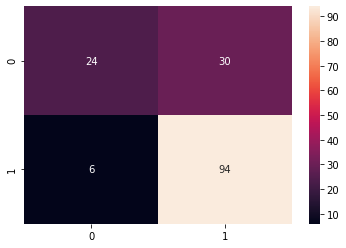

In [147]:
sns.heatmap(cm,annot=True)